<h1>Ken Lloyd O. Alcoreza</h1>
<hr>
<h2>Examination</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import seaborn as sns

data = pd.read_csv('Chicago_Crimes.csv')

<H1>Data Filtering</H1>

In [2]:
data['Location Description'] = data['Location Description'].fillna(data['Location Description'].mode()[0])
data['X Coordinate'] = data['X Coordinate'].fillna(data['X Coordinate'].mean())
data['Y Coordinate'] = data['Y Coordinate'].fillna(data['Y Coordinate'].mean())
data['Latitude'] = data['Latitude'].fillna(data['Latitude'].mean())
data['Longitude'] = data['Longitude'].fillna(data['Longitude'].mean())
data['Location'] = data['Location'].fillna(data['Location'].mode()[0])
data['Community Area'] = data['Community Area'].fillna(data['Community Area'].mode()[0])

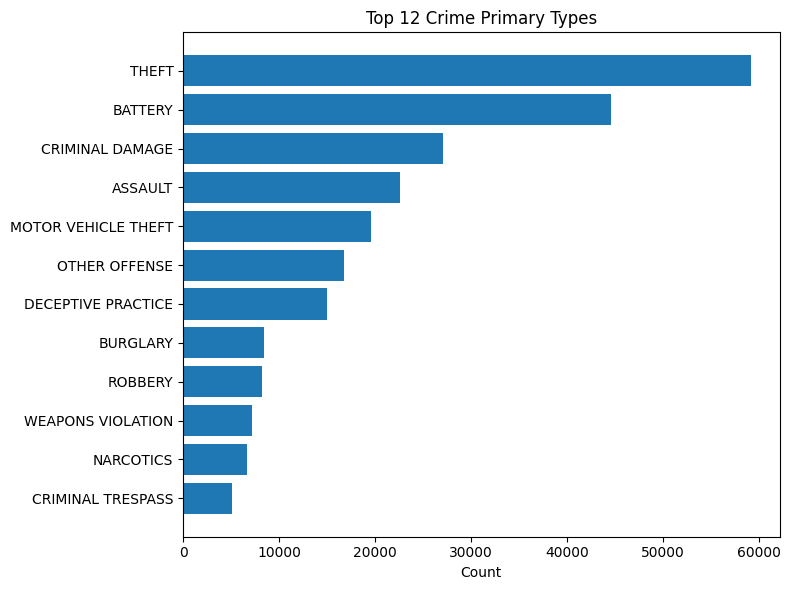

In [3]:
top_primary = data['Primary Type'].value_counts().head(12)

plt.figure(figsize=(8,6))
plt.barh(top_primary.index[::-1], top_primary.values[::-1])
plt.title("Top 12 Crime Primary Types")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

<h1>Insight:</h1>
<h2>Most of the crimes come from just a few types.</h2>

<h1>Insight:</h1>
<h2>The number one crime type happens much more often than the others.</h2>

<h1>Insight:</h1>
<h2>A lot of crime types happen only rarely compared to the top few.</h2>

<h1>Insight:</h1>
<h2>If the city focused on the top 3–5 crime types, it would cover most of the problems.</h2>

<h1>Insight:</h1>
<h2>Some crimes don’t happen as often but can still be serious — fewer doesn’t mean less important.</h2>

<h1>Insight:</h1>
<h2>Almost all crimes are labeled, very few have missing types.</h2>

C:\Users\kenll\AppData\Local\Temp\ipykernel_19188\3890889122.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


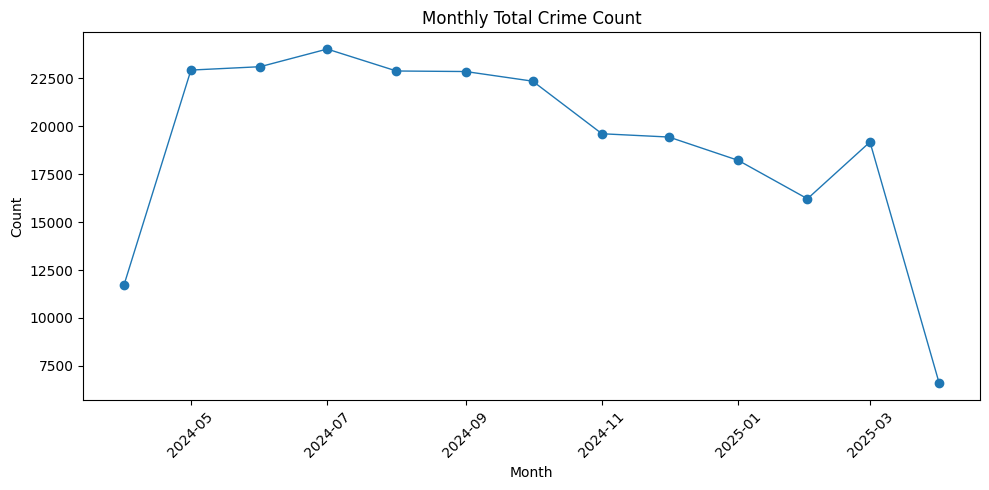

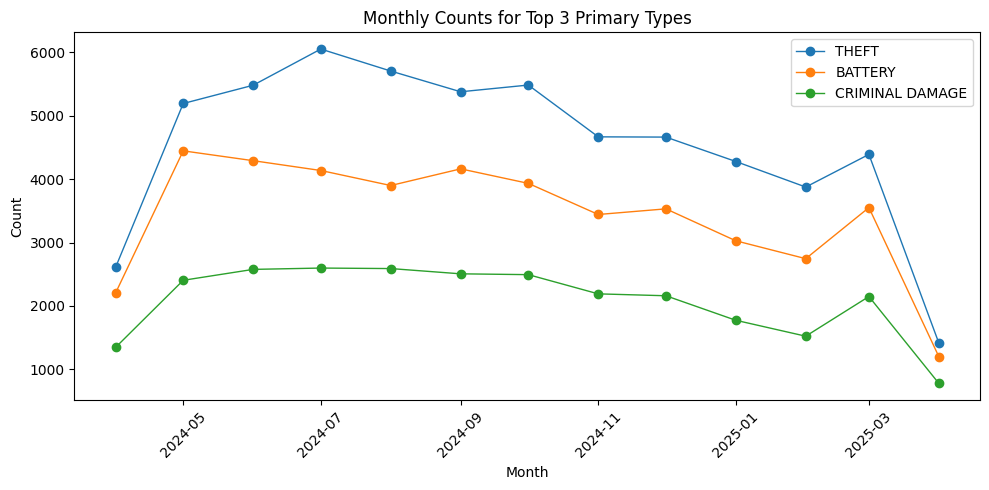

In [4]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

data['MonthYear'] = data['Date'].dt.to_period('M').astype(str)

monthly_total = data.groupby('MonthYear').size().reset_index(name='count')
monthly_total['MonthYear_pd'] = pd.to_datetime(monthly_total['MonthYear'] + "-01", errors='coerce')
monthly_total = monthly_total.sort_values('MonthYear_pd')

plt.figure(figsize=(10,5))
plt.plot(monthly_total['MonthYear_pd'], monthly_total['count'], marker='o', linewidth=1)
plt.title("Monthly Total Crime Count")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top3 = data['Primary Type'].value_counts().head(3).index.tolist()
plt.figure(figsize=(10,5))
for t in top3:
    series = data[data['Primary Type']==t].groupby('MonthYear').size().reset_index(name='count')
    series['MonthYear_pd'] = pd.to_datetime(series['MonthYear'] + "-01", errors='coerce')
    series = series.sort_values('MonthYear_pd')
    plt.plot(series['MonthYear_pd'], series['count'], marker='o', linewidth=1, label=t)
plt.legend()
plt.title("Monthly Counts for Top 3 Primary Types")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



<h1>Insight:</h1>
<h2>Crime numbers go up and down every month — they aren’t steady.</h2>

<h1>Insight:</h1>
<h2>Some months clearly stand out with higher spikes than the rest.</h2>

<h1>Insight:</h1>
<h2>The top 3 crime types follow the same rise-and-fall pattern, but some go up more sharply than others.</h2>

<h1>Insight:</h1>
<h2>Certain crimes seem to happen more in particular seasons — for example, some might increase in summer.</h2>

<h1>Insight:</h1>
<h2>Over time, crime can be seen slowly rising or falling overall, not just bouncing around monthly.</h2>

<h1>Insight:</h1>
<h2>If a month shows very low numbers, it might be a reporting gap, not actually less crime.</h2>

In [5]:
import folium
map_data = data.dropna(subset=['Latitude','Longitude'])

crime_map = folium.Map(location=[map_data['Latitude'].mean(), map_data['Longitude'].mean()],
                       zoom_start=11, tiles='CartoDB positron')

for idx, row in map_data.sample(500, random_state=42).iterrows():  
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,
        color="red",
        fill=True,
        fill_opacity=0.6
    ).add_to(crime_map)

crime_map.save("crime_hotspot_map.html")
crime_map

<h1>Insight:</h1>
<h2>The map shows crimes spread across the city, not just one spot.</h2>

<h1>Insight:</h1>
<h2>Downtown Chicago lights up the most, meaning it has heavy crime activity.</h2>

<h1>Insight:</h1>
<h2>The farther you go from the city center, the fewer crime dots you see.</h2>

<h1>Insight:</h1>
<h2>Some areas look like small clusters — meaning repeated incidents nearby.</h2>

<h1>Insight:</h1>
<h2>Not all neighborhoods are equally affected; some are much calmer.</h2>

<h1>Insight:</h1>
<h2>The map makes it easy to see high-risk areas at a glance.</h2>

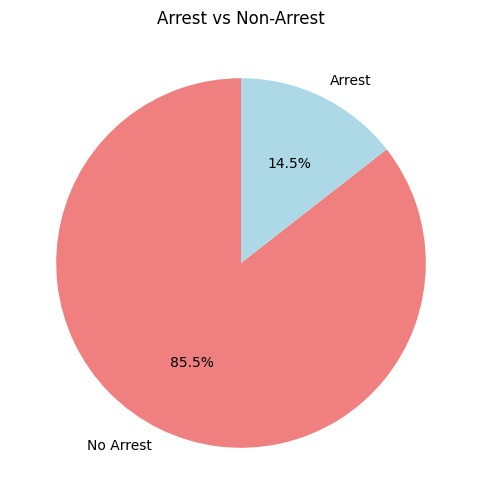

In [6]:
arrest_counts = data['Arrest'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(arrest_counts, labels=['No Arrest','Arrest'], autopct='%1.1f%%', startangle=90, colors=['lightcoral','lightblue'])
plt.title("Arrest vs Non-Arrest")
plt.show()


<h1>Insight:</h1>
<h2>Most crimes do not lead to an arrest.</h2>

<h1>Insight:</h1>
<h2>Only a smaller slice of cases result in someone being caught.</h2>

<h1>Insight:</h1>
<h2>This shows that crime is often reported but not always solved quickly.</h2>

<h1>Insight:</h1>
<h2>The big gap between arrests and non-arrests highlights challenges in law enforcement.</h2>

<h1>Insight:</h1>
<h2>Still, arrests do happen regularly, meaning action is being taken.</h2>

<h1>Insight:</h1>
<h2>The data suggests prevention might matter as much as catching offenders.</h2>

C:\Users\kenll\AppData\Local\Temp\ipykernel_19188\2554158977.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="viridis")


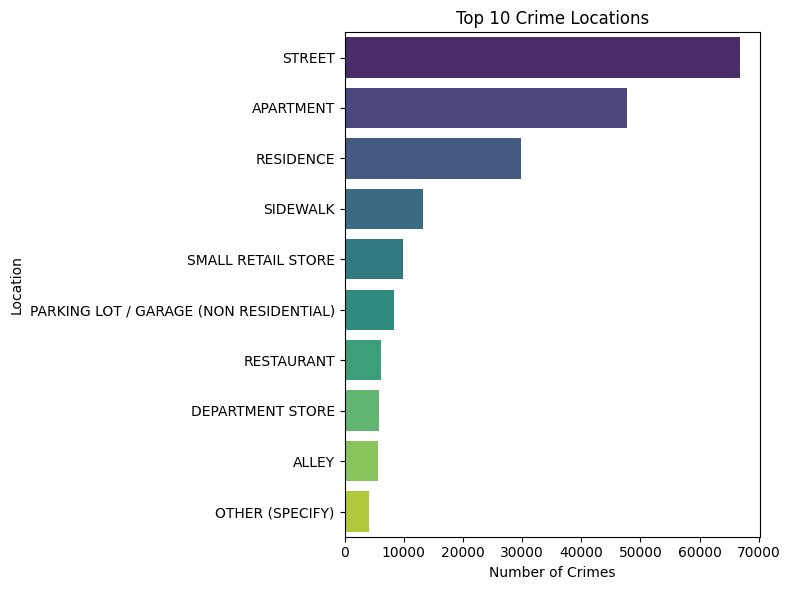

In [7]:
top_locations = data['Location Description'].value_counts().head(10)
plt.figure(figsize=(8,6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="viridis")
plt.title("Top 10 Crime Locations")
plt.xlabel("Number of Crimes")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

<h1>Insight:</h1>
<h2>Most crimes happen in public spaces, not hidden spots.</h2>

<h1>Insight:</h1>
<h2>Streets and sidewalks are the top locations, showing crimes often happen out in the open.</h2>

<h1>Insight:</h1>
<h2>Stores and homes also show up, proving that both public and private areas are affected.</h2>

<h1>Insight:</h1>
<h2>Some “usual hangout places” (like gas stations or alleys) appear more often than expected.</h2>

<h1>Insight:</h1>
<h2>The top 10 locations together account for the majority of reported crimes.</h2>

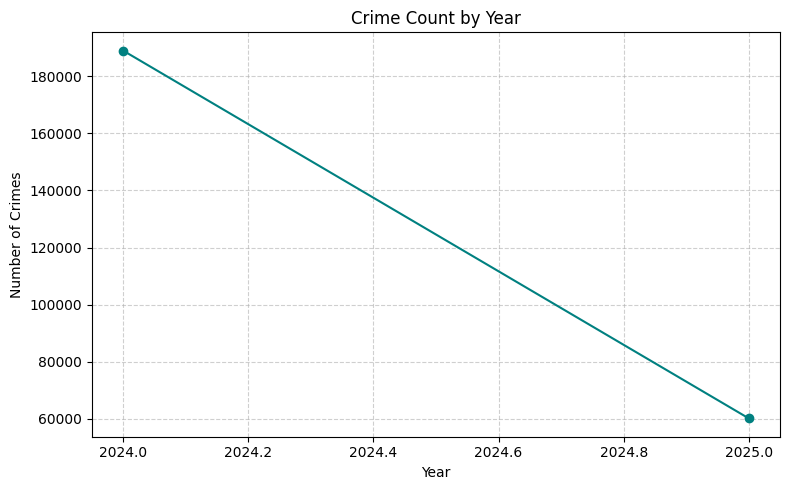

In [8]:
yearly_counts = data['Year'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', color='teal')
plt.title("Crime Count by Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


<h1>Insight:</h1>
<h2>Crime numbers rise and fall depending on the year — some years clearly had more trouble than others.</h2>

<h1>Insight:</h1>
<h2>The line shows long-term patterns, making it easy to spot if things are getting better or worse.</h2>